Importing libraries

Pandas

Numpy

Matplotlib

Pytourch

These libraries will be used for data manipulation, visualization, and model development.

In [1535]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

stockprice.head()

In [1536]:
stockprice = pd.read_csv('/content/stocks.csv')


In [1537]:
stockprice.shape

(248, 8)

find any missing value

In [1538]:
stockprice.isnull().sum()

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [1539]:
stockprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [1540]:
stockprice.isnull().sum()

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [1541]:
# Check unique tickers
print("Unique tickers:", stockprice['Ticker'].unique())

Unique tickers: ['AAPL' 'MSFT' 'NFLX' 'GOOG']


In [1542]:
# Focus on AAPL
stockprice = stockprice[stockprice['Ticker'] == 'AAPL']
stockprice.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [1543]:
#drop missing values
stockprice = stockprice.dropna(subset=['High','Low','Volume','Close'])
stockprice.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


Now we have to work only on HIGH LOW CLOSE and OPEN then we drop extra colums

In [1544]:
stockprice = stockprice.drop(columns=['Adj Close','Date'])


In [1545]:
# check the data set
stockprice.head()

,Ticker,Open,High,Low,Close,Volume
0,AAPL,150.639999,155.229996,150.639999,154.649994,83322600
1,AAPL,153.880005,154.580002,151.169998,151.919998,64120100
2,AAPL,153.779999,154.330002,150.419998,150.869995,56007100
3,AAPL,149.460007,151.339996,149.220001,151.009995,57450700
4,AAPL,150.949997,154.259995,150.919998,153.850006,62199000


In [1546]:
stockprice.tail()

,Ticker,Open,High,Low,Close,Volume
57,AAPL,169.279999,170.449997,168.639999,169.589996,52472900
58,AAPL,170.089996,170.350006,167.539993,168.539993,48425700
59,AAPL,169.500000,170.919998,167.160004,167.449997,65136000
60,AAPL,164.889999,167.039993,164.309998,165.789993,81235400
61,AAPL,170.979996,174.300003,170.759995,173.570007,113316400


In [1547]:
stockprice.shape

(62, 6)

In [1548]:
feature = ['High','Low','Volume']
target = stockprice['Close']
X = stockprice[feature].values
y = stockprice[target.name].values.reshape(-1,1)
# Convert to tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print(X.shape)
print(y.shape)

torch.Size([62, 3])
torch.Size([62, 1])


In [1549]:
# === 80/20 split ===
n_samples = X.shape[0]
train_size = int(0.8 * n_samples)

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Standardize
X_mean = X_train.mean(dim=0)
X_std = X_train.std(dim=0)
X_train_std = (X_train - X_mean) / X_std
X_test_std = (X_test - X_mean) / X_std

# Train and evaluate model

# Fix standard deviation
X_std[X_std == 0] = 1.0

# Standardize
X_train_std = (X_train - X_mean) / X_std
X_test_std = (X_test - X_mean) / X_std

# Initialize
weight = torch.randn((X_train.shape[1], 1), requires_grad=True)
bias = torch.randn(1, requires_grad=True)
learning_rate = 0.003
epochs = 1000

for epoch in range(epochs):
    y_pred = X_train_std @ weight + bias
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()

    with torch.no_grad():
        weight -= learning_rate * weight.grad
        bias -= learning_rate * bias.grad

    weight.grad.zero_()
    bias.grad.zero_()

# Evaluation
with torch.no_grad():
    y_pred_test = X_test_std @ weight + bias

    # check for NaN
    if torch.isnan(y_pred_test).any():
        print("Warning: NaN in predictions")

    mse = ((y_pred_test - y_test) ** 2).mean().item()

    y_true = y_test.numpy().flatten()
    y_pred_np = y_pred_test.numpy().flatten()

    if np.isnan(y_pred_np).any():
        print("Warning: NaN in y_pred_np")

    ss_res = ((y_true - y_pred_np) ** 2).sum()
    ss_tot = ((y_true - y_true.mean()) ** 2).sum()
    r2 = 1 - ss_res / ss_tot

print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

Test MSE: 0.6566
Test R²: 0.9050


In [1550]:
# === 60/40 split ===
n_samples = X.shape[0]
train_size = int(0.6 * n_samples)

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Standardize
X_mean = X_train.mean(dim=0)
X_std = X_train.std(dim=0)
X_train_std = (X_train - X_mean) / X_std
X_test_std = (X_test - X_mean) / X_std

# Train and evaluate model

# standard deviation
X_std[X_std == 0] = 1.0

# Standardize
X_train_std = (X_train - X_mean) / X_std
X_test_std = (X_test - X_mean) / X_std

# Initialize
weight = torch.randn((X_train.shape[1], 1), requires_grad=True)
bias = torch.randn(1, requires_grad=True)
learning_rate = 0.003
epochs = 1000

for epoch in range(epochs):
    y_pred = X_train_std @ weight + bias
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()

    with torch.no_grad():
        weight -= learning_rate * weight.grad
        bias -= learning_rate * bias.grad

    weight.grad.zero_()
    bias.grad.zero_()

# Evaluation
with torch.no_grad():
    y_pred_test = X_test_std @ weight + bias

    # check for NaN
    if torch.isnan(y_pred_test).any():
        print("Warning: NaN in predictions")

    mse = ((y_pred_test - y_test) ** 2).mean().item()

    y_true = y_test.numpy().flatten()
    y_pred_np = y_pred_test.numpy().flatten()

    if np.isnan(y_pred_np).any():
        print("Warning: NaN in y_pred_np")

    ss_res = ((y_true - y_pred_np) ** 2).sum()
    ss_tot = ((y_true - y_true.mean()) ** 2).sum()
    r2 = 1 - ss_res / ss_tot

print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

Test MSE: 1.2627
Test R²: 0.8416


In [1551]:
# === 70/30 split ===
n_samples = X.shape[0]
train_size = int(0.7 * n_samples)

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Standardize
X_mean = X_train.mean(dim=0)
X_std = X_train.std(dim=0)
X_train_std = (X_train - X_mean) / X_std
X_test_std = (X_test - X_mean) / X_std

# Train and evaluate model

# Fix standard deviation
X_std[X_std == 0] = 1.0

# Standardize
X_train_std = (X_train - X_mean) / X_std
X_test_std = (X_test - X_mean) / X_std

# Initialize
weight = torch.randn((X_train.shape[1], 1), requires_grad=True)
bias = torch.randn(1, requires_grad=True)
learning_rate = 0.003
epochs = 1000

for epoch in range(epochs):
    y_pred = X_train_std @ weight + bias
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()

    with torch.no_grad():
        weight -= learning_rate * weight.grad
        bias -= learning_rate * bias.grad

    weight.grad.zero_()
    bias.grad.zero_()

# Evaluation
with torch.no_grad():
    y_pred_test = X_test_std @ weight + bias

    # check for NaN
    if torch.isnan(y_pred_test).any():
        print("Warning: NaN in predictions")

    mse = ((y_pred_test - y_test) ** 2).mean().item()

    y_true = y_test.numpy().flatten()
    y_pred_np = y_pred_test.numpy().flatten()

    if np.isnan(y_pred_np).any():
        print("Warning: NaN in y_pred_np")

    ss_res = ((y_true - y_pred_np) ** 2).sum()
    ss_tot = ((y_true - y_true.mean()) ** 2).sum()
    r2 = 1 - ss_res / ss_tot

print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

Test MSE: 0.7187
Test R²: 0.9220


In [1552]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test_std)

In [1553]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test, y_pred)
print(error)

108.91442108154297


In [1554]:
print(X_train_std)

tensor([[-0.1360, -0.4307,  1.6654],
        [-0.2548, -0.3358,  0.1832],
        [-0.3005, -0.4702, -0.4430],
        [-0.8470, -0.6852, -0.3316],
        [-0.3133, -0.3806,  0.0349],
        [-0.4029, -0.3913, -0.0030],
        [-0.0867, -0.0293,  0.2954],
        [ 0.0650,  0.0549,  0.4956],
        [-0.5436, -0.3931, -0.2009],
        [-0.8543, -0.8303, -0.2223],
        [-1.1010, -1.0543, -0.8287],
        [-1.0298, -1.0400, -1.0307],
        [-1.6055, -1.3124, -0.4845],
        [-1.2436, -1.0024, -1.2928],
        [-1.2601, -1.1135, -0.8645],
        [-1.5982, -1.4396, -0.4838],
        [-1.6932, -1.6385, -0.7340],
        [-0.8890, -1.0239,  0.6936],
        [ 0.0596,  0.0746,  1.9923],
        [-0.3553, -0.3429, -0.4295],
        [-0.4577, -0.2175, -1.1225],
        [-0.2621, -0.5042, -0.6108],
        [-0.9201, -0.9737,  0.5268],
        [-0.5180, -0.9576,  1.7529],
        [-0.4705, -0.5275,  0.9223],
        [-0.4979, -0.5598,  1.1903],
        [ 0.0888, -0.2515,  1.1126],
 

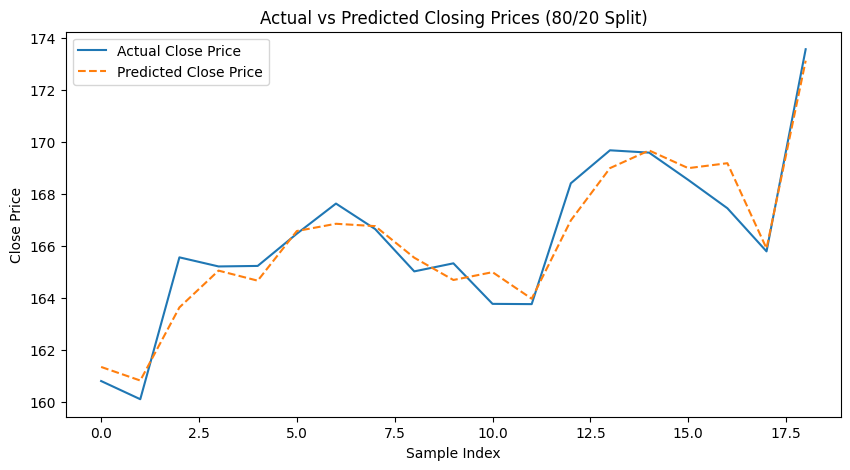

In [1555]:


actual_80 = y_test.numpy().flatten()
predicted_80 = y_pred_test.detach().numpy().flatten()

# Line Plot
plt.figure(figsize=(10,5))
plt.plot(actual_80, label='Actual Close Price')
plt.plot(predicted_80, label='Predicted Close Price', linestyle='--')
plt.title('Actual vs Predicted Closing Prices (80/20 Split)')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


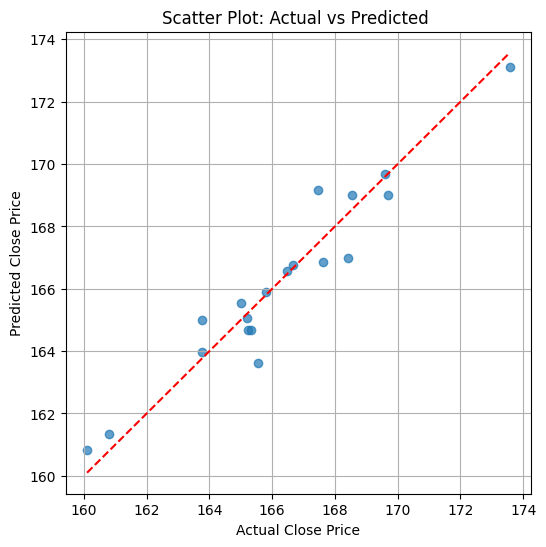

In [1556]:

# Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(actual_80, predicted_80, alpha=0.7)
plt.plot([actual_80.min(), actual_80.max()], [actual_80.min(), actual_80.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Scatter Plot: Actual vs Predicted ')
plt.grid(True)
plt.show()
